In [1]:
import rosbag
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bag = rosbag.Bag('kinematics.bag')
messages = []
for topic, msg, t in bag.read_messages(topics=['world_kinematics']):
    messages.append(msg)
bag.close()

In [3]:
n = len(messages)
n

1293

In [4]:
X = np.zeros((n, 3))
for i, message in enumerate(messages):
    X[i, :] = message.data
X

array([[ 0.32      ,  0.32148004,  1.54119554],
       [ 0.32      ,  0.32148004,  1.54119554],
       [ 0.32      ,  0.32148004,  1.54119554],
       ...,
       [-0.66459258, -0.13266648,  1.85982285],
       [-0.66712362, -0.12415458,  1.83022207],
       [-0.66902196, -0.11700201,  1.83022207]])

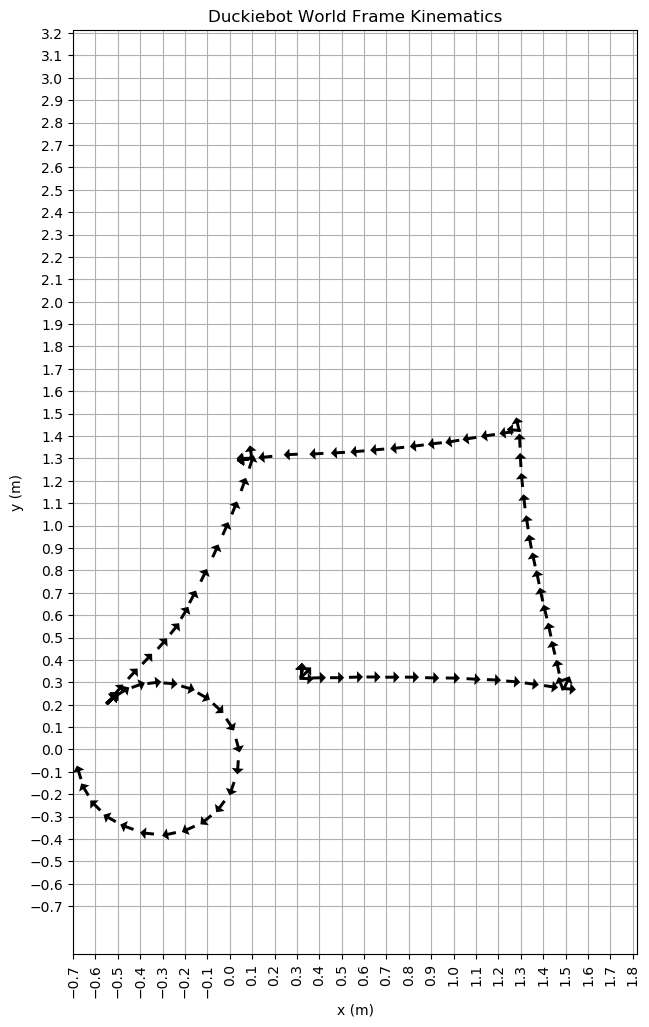

In [75]:
X_sparse = X[::10, :]

dims = np.array([1.82, 3])

figure = plt.figure(figsize=4*dims)
plt.grid()
plt.title('Duckiebot World Frame Kinematics')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.quiver(
    X_sparse[:, 0],
    X_sparse[:, 1],
    np.cos(X_sparse[:, 2]),
    np.sin(X_sparse[:, 2]),
    scale=40,
    headwidth=4,
    headlength=2,
    headaxislength=2
)
plt.axis('equal')
figure.axes[0].set_axisbelow(True)
plt.xticks(np.arange(-.7, dims[0] + 1, 0.1), rotation=90)
plt.yticks(np.arange(-.7, dims[1] + 1, 0.1))
plt.xlim(-.7, dims[0])
plt.ylim(-.7, dims[1])
plt.savefig('kinematics.png')
plt.show()